<a href="https://colab.research.google.com/github/vicentcamison/idal_ia3/blob/main/3%20Aprendizaje%20profundo%20(II)/Sesion%206/1_Damped_sine_LSTM_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from math import sin
from math import pi
from math import exp
from random import random
from random import randint
from random import uniform
from numpy import array
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt

import numpy as np

In [2]:
# generate damped sine wave in [0,1]
def generate_sequence(length, period, decay):
  return [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]

In [3]:
# generate input and output pairs of damped sine waves
def generate_examples(length, n_patterns, output):
  X, y = list(), list()
  for _ in range(n_patterns):
    p = randint(10, 20)
    d = uniform(0.01, 0.1)
    sequence = generate_sequence(length + output, p, d)
    X.append(sequence[:-output])
    y.append(sequence[-output:])
  X = array(X).reshape(n_patterns, length, 1)
  y = array(y).reshape(n_patterns, output)
  return X, y

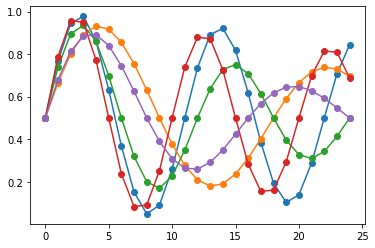

In [4]:
# test problem generation
X, y = generate_examples(20, 5, 5)
for i in range(len(X)):
  plt.plot([x for x in X[i, :, 0]] + [x for x in y[i]],'-o')
plt.show()

*    Genera 10000 secuencias de entrenamiento, de longitud 50 (predecir 10 últimos valores).
*    Entrena (model.fit(...)) 5 epochs con batch_size=10 (loss function: ‘MAE’, optimizador:
‘adam’).
*    Genera 1000 secuencias de test. Evalúa el MAE (model.evaluate(...)).
*    Representa una secuencia predicha (model.predict(...)) frente a la deseada.
*    Crea una red LSTM de dimensión oculta 20 y una capa densa para predecir las
secuencias de salida. Visualiza el modelo con summary.
*    Repite añadiendo una segunda capa LSTM también de dimensión 20. Observa el MAE en
test.

In [5]:
# Generamos 10.000 secuencias
X, y = generate_examples(50, 10000, 10)

In [6]:
X.shape

(10000, 50, 1)

In [8]:
y.shape

(10000, 10)

In [10]:
# Creamos el modelo
model = Sequential()
model.add(LSTM(20, input_shape=(50, 1))) # 50 time steps son los que se muestran de forma simultánea, y únicamente hay una feature: el valor de la función en ese time step
model.add(Dense(10)) # son 10 neuronas de salida para los 10 valores de la función que queremos predecir

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 1,970
Trainable params: 1,970
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='mae', optimizer='adam')
model.fit(x=X, y=y, batch_size=10, epochs=10)

Epoch 1/10
1000/1000 [==============================] - 10s 8ms/step - loss: 0.0111
Epoch 2/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0109
Epoch 3/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0101
Epoch 4/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0104
Epoch 5/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0097
Epoch 6/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0093
Epoch 7/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0089
Epoch 8/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0092
Epoch 9/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0086
Epoch 10/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0082


In [12]:
# Generamos 1000 secuencias de test

X_test, y_test = generate_examples(50, 1000, 10)

model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 4ms/step - loss: 0.0158


0.015776855871081352

In [16]:
# El loss obtenido es de 0.015.

# Pasemos ahora a implementar un segundo modelo que contenga una segunda capa LSTM también de dimensión 20

model2 = Sequential()
model2.add(LSTM(20, input_shape=(50, 1), return_sequences=True)) #la primera capa ha de tener return_sequences=True
model2.add(LSTM(20))
model2.add(Dense(10))

model2.compile(loss='mae', optimizer='adam')
model2.fit(x=X, y=y, batch_size=10, epochs=10)

Epoch 1/10
1000/1000 [==============================] - 20s 17ms/step - loss: 0.0814
Epoch 2/10
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0252
Epoch 3/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0191
Epoch 4/10
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0176
Epoch 5/10
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0156
Epoch 6/10
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0146
Epoch 7/10
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0125
Epoch 8/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0112
Epoch 9/10
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0096
Epoch 10/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0086


In [17]:
model2.evaluate(X_test, y_test)

32/32 [==============================] - 1s 7ms/step - loss: 0.0081


0.008140758611261845

El loss se ha reducido a prácticamente la mitad

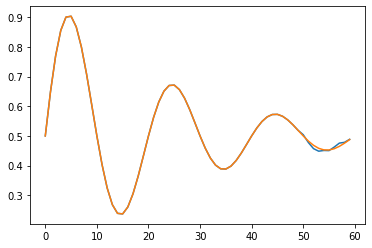

In [30]:
plt.figure()
plt.plot(np.append(X[0,:,:].flatten(),model2.predict(x=X)[0,:].flatten()))
plt.plot(np.append(X[0,:,:], y[0,:]))
plt.show()

Oye, pues casi que lo clava: se aproxima esxelentemente bien!!